In [444]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from scipy.stats import linregress


def calculate_line(m,x,c):
    return np.dot(m,x) + c


def check_fit(slope, intercept, raw_domain, raw_range):
    predicted_value = calculate_line(slope, raw_domain, intercept)
    
    return (predicted_value - raw_range)**2


def check_fitness(period, mass, set_slope = False):
    period = np.array(period)
    mass = np.array(mass)
    slope, intercept,  r_value, p_value, std_err = linregress(mass,period)
    if set_slope == True:
        slope = 0
    bestfit_period = calculate_line(slope,mass,intercept)
    return np.sum(np.square(bestfit_period - period))#/len(period)


def update_upper_group():
    upper_period = [period[i] for i in range(len(group)) if group[i] == 1 ]
    upper_mass = [mass[i] for i in range(len(group))  if group[i] == 1 ]
    return upper_period,upper_mass
    
path = "d:data\Pleiades_Hartman.csv"
path = "/home/edoodson/Documents/spin_down/data/Pleiades_Hartman.csv"

data_frame = pd.read_csv(path, encoding = "utf-8", delimiter = "\t", comment = "#")

mass = data_frame.M.tolist()
period = data_frame.Per.tolist()

data_len = int(len(mass))

# fig,ax = plt.subplots(1,figsize=(10,6))

# ax.invert_xaxis()
# ax.scatter(mass,period, marker="x")
q1 = [1,2,3,4,5]
p1 = [1,3,5,7,-9000]

check_fitness(q1,p1)


5.005553085804267

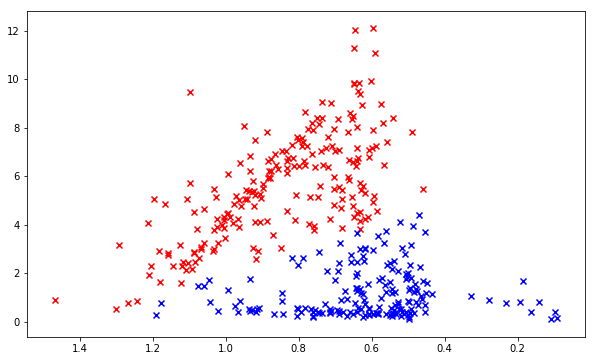

In [427]:
fake_y = calculate_line(-5,mass,7)
group = [1  if period[i] >= fake_y[i] else 0  for i in range(len(period))]

fig2, ax2 = plt.subplots(1, figsize = (10,6))
ax2.invert_xaxis()
for i in range(len(fake_y)):
    if group[i] == 1:
        ax2.scatter(mass[i], period[i], color = "red", marker = "x")
    else:
        ax2.scatter(mass[i], period[i], color = "blue", marker = "x")


-0.44179626605233424


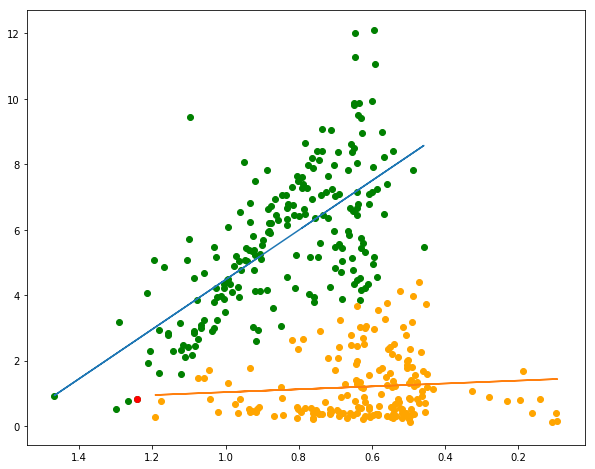

In [418]:

upper_period = [period[i] for i in range(len(group)) if group[i] == 1 ]
upper_mass = [mass[i] for i in range(len(group))  if group[i] == 1 ]

lower_period = [period[i]  for i in range(len(group)) if group[i] == 0]
lower_mass = [mass[i]  for i in range(len(group)) if group[i] == 0]

upper_slope, upper_intercept, _,_,_ = linregress((upper_mass,upper_period))
lower_slope, lower_intercept, _,_,_ = linregress((lower_mass,lower_period))

# fake_domain = np.linspace (1.4,0,len(upper_mass))

fake_upper_range = calculate_line(upper_slope,upper_mass,upper_intercept)
fake_lower_range = calculate_line(lower_slope, lower_mass, lower_intercept)

fig2,ax2 = plt.subplots(1, figsize = (10,8))
ax2.scatter(upper_mass,upper_period, color = "g")
ax2.scatter(lower_mass, lower_period, color = "orange")
ax2.plot(upper_mass,fake_upper_range)
ax2.plot(lower_mass,fake_lower_range)
number = 259
ax2.scatter(mass[number], period[number], color = "red")
ax2.invert_xaxis()
print(lower_slope)

In [429]:
##this code runs through all stars, changing them to the best line, NOT line to best data fit(WRONG!)
# for i,(mass_datum,period_datum) in enumerate(zip(mass,period)):
    
#     upper_fit = check_fit(upper_slope, upper_intercept, mass_datum, period_datum)
#     lower_fit = check_fit(lower_slope, lower_intercept, mass_datum, period_datum)
#     chosen_fit = min(lower_fit, upper_fit)

#     if chosen_fit == upper_fit:
#         group[i] = 1
#     if chosen_fit == lower_fit:
#         group[i] = 0
fake_y = calculate_line(-5,mass,7)
group = [1  if period[i] >= fake_y[i] else 0  for i in range(len(period))]

for l in range(1):
    for k in range(len(group)):
        upper_period = [period[i] for i in range(len(group)) if group[i] == 1 ]
        upper_mass = [mass[i] for i in range(len(group))  if group[i] == 1 ]

        lower_period = [period[i]  for i in range(len(group)) if group[i] == 0]
        lower_mass = [mass[i]  for i in range(len(group)) if group[i] == 0]

        upper_fitness = check_fitness(upper_period, upper_mass)
        lower_fitness = check_fitness(lower_period, lower_mass)
        

        if group[k] == 1:
            #changes the group of the current star
            group[k] = 0
            #redefines the upper group and lower group with the star moved
            upper_period_new = [period[i] for i in range(len(group)) if group[i] == 1 ]
            upper_mass_new = [mass[i] for i in range(len(group))  if group[i] == 1 ]

            #calculates the new fitness of the new groups
            upper_fitness_new = check_fitness(upper_period_new, upper_mass_new)

            if upper_fitness_new < upper_fitness:
                group[k] = 0
                
            if upper_fitness_new > upper_fitness:
                group[k] = 1



#         elif group[k] ==0:
#             #changes the group of the current star
#             group[k] = 1
#             #redefines the upper group and lower group with the star moved
#             lower_period_new = [period[i]  for i in range(len(group)) if group[i] == 0]
#             lower_mass_new = [mass[i]  for i in range(len(group)) if group[i] == 0]
            
#             #calculates the new fitness of the new groups
#             lower_fitness_new = check_fitness(lower_period_new, lower_mass_new)

#             #sets group of the star to the new group if the fit in the new group is better(lower)
#             if lower_fitness_new < lower_fitness:
#                 group[k] = 1
#             if lower_fitness_new > lower_fitness:
#                 group[k] = 0
                
upper_period = [period[i] for i in range(len(group)) if group[i] == 1 ]
upper_mass = [mass[i] for i in range(len(group))  if group[i] == 1 ]

lower_period = [period[i]  for i in range(len(group)) if group[i] == 0]
lower_mass = [mass[i]  for i in range(len(group)) if group[i] == 0]



fig3,ax3 = plt.subplots(1, figsize = (10,8))
ax3.scatter(upper_mass,upper_period, color = "g")
ax3.scatter(lower_mass, lower_period, color = "orange")

ax3.plot(upper_mass,calculate_line(linregress(upper_mass,upper_period)[0],upper_mass,linregress(upper_mass,upper_period)[1]  ))
ax3.plot(lower_mass,calculate_line(linregress(lower_mass,lower_period)[0],lower_mass,linregress(lower_mass,lower_period)[1]  ))
# ax3.plot(lower_mass,fake_lower_range)
ax3.invert_xaxis()

        
        
    
    

ValueError: Inputs must not be empty.

In [ ]:
for a,(b,c) in enumerate(zip(mass,period)):
    print(a,b,c)
